$\textit{k}$-nearest neightbors to detect outliers algorithm toy example

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

We first generate some random points in x-y plane, and two points that we are going to use as examples.

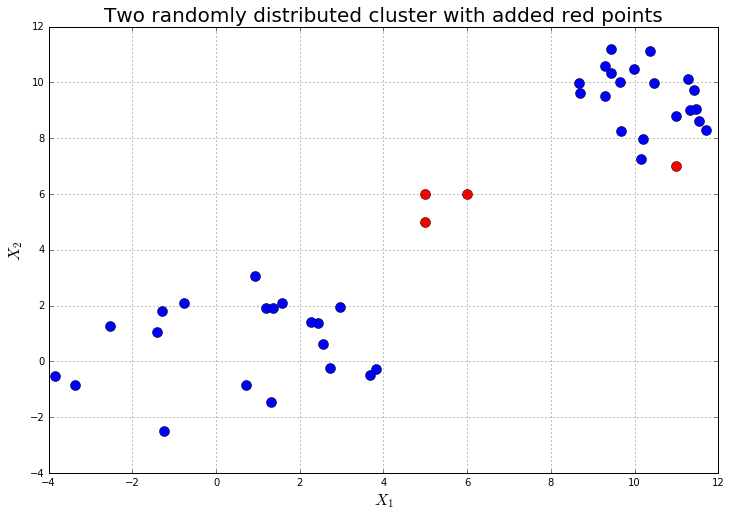

In [13]:
np.random.seed(1337)
cs = 20
x1 = np.random.multivariate_normal([10,10], [[1,0],[0,1]], cs)
x2 = np.random.multivariate_normal([1,1], [[5,0],[0,2]], cs)
x3 = [[11,7]]
x4 = [[5,6],[6,6],[5,5]]
X12 = np.concatenate((x1,x2), axis=0)
X = np.concatenate((X12, x3, x4), axis=0)

f1 = plt.figure(figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
ax1 = f1.add_subplot(111)
ax1.plot(*zip(*X12), marker='o', color='b', markersize=10, ls='')
ax1.plot(*zip(*x3), marker='o', color='r', markersize=10, ls='')
ax1.plot(*zip(*x4), marker='o', color='r', markersize=10, ls='')
ax1.grid(True)
ax1.set_xlabel('$X_1$', fontsize=16)
ax1.set_ylabel('$X_2$', fontsize=16)
ax1.set_title('Two randomly distributed cluster with added red points', fontsize=20)

The red point is an obvious outlier. The green point is a little outside the cluster, but could very well be a realistic value.

We now will use the Local Outlier Factor (LOF) to determine which points are outliers.

In [9]:
#knn function gets the dataset and calculates K-Nearest neighbors and distances
def knn(df,k):
    nbrs = NearestNeighbors(n_neighbors=k)
    nbrs.fit(df)
    distances, indices = nbrs.kneighbors(df)
    return distances, indices

#reachDist calculates the reach distance of each point to MinPts around it
def reachDist(df,MinPts,knnDist):
    nbrs = NearestNeighbors(n_neighbors=MinPts)
    nbrs.fit(df)
    distancesMinPts, indicesMinPts = nbrs.kneighbors(df)
    distancesMinPts[:,0] = np.amax(distancesMinPts,axis=1)
    distancesMinPts[:,1] = np.amax(distancesMinPts,axis=1)
    distancesMinPts[:,2] = np.amax(distancesMinPts,axis=1)
    return distancesMinPts, indicesMinPts

#lrd calculates the Local Reachability Density
def lrd(MinPts,knnDistMinPts):
    return (MinPts/np.sum(knnDistMinPts,axis=1))

#Finally lof calculates lot outlier scores
def lof(Ird,MinPts,dsts):
    lof=[]
    for item in dsts:
       tempIrd = np.divide(Ird[item[1:]],Ird[item[0]])
       lof.append(tempIrd.sum()/MinPts)
    return lof

k = 5 #For can be changed
knndist, knnindices = knn(X,k)
reachdist, reachindices = reachDist(X,k,knndist)
irdMatrix = lrd(5,reachdist)
lofScores = np.array(lof(irdMatrix,5,reachindices))

Several sources define outliers as points with greater value than 1.2. In this example we get the following LOF scores.

In [10]:
lofScores

array([ 0.81863207,  1.0751897 ,  0.78420296,  0.87953111,  0.61247203,
        0.93318829,  0.92417535,  1.02883403,  0.73836768,  0.96936661,
        0.83503847,  1.07576209,  1.14003153,  1.08870266,  0.70346239,
        0.73640731,  0.73941338,  0.94578233,  1.18148815,  0.73455605,
        1.16734103,  1.00729204,  0.73611676,  1.2065107 ,  1.17237087,
        1.07869386,  0.99919257,  1.13881737,  1.03626965,  0.86028439,
        0.63265282,  0.93682899,  0.81108567,  0.72721552,  0.81138156,
        0.73090498,  0.81433504,  0.86151822,  0.82214669,  0.86848627,
        1.46701157,  1.70347729,  1.53507738,  1.80095025])

We see that the red point gets a LOF score of 2.54, way above the set limit. We also notice that one more point has a value greater than 1.2. This is the leftmost point, and has a LOF score of 1.63.

The basic idea of LOF is to compare the density of each point against its k-nearest neighbors.

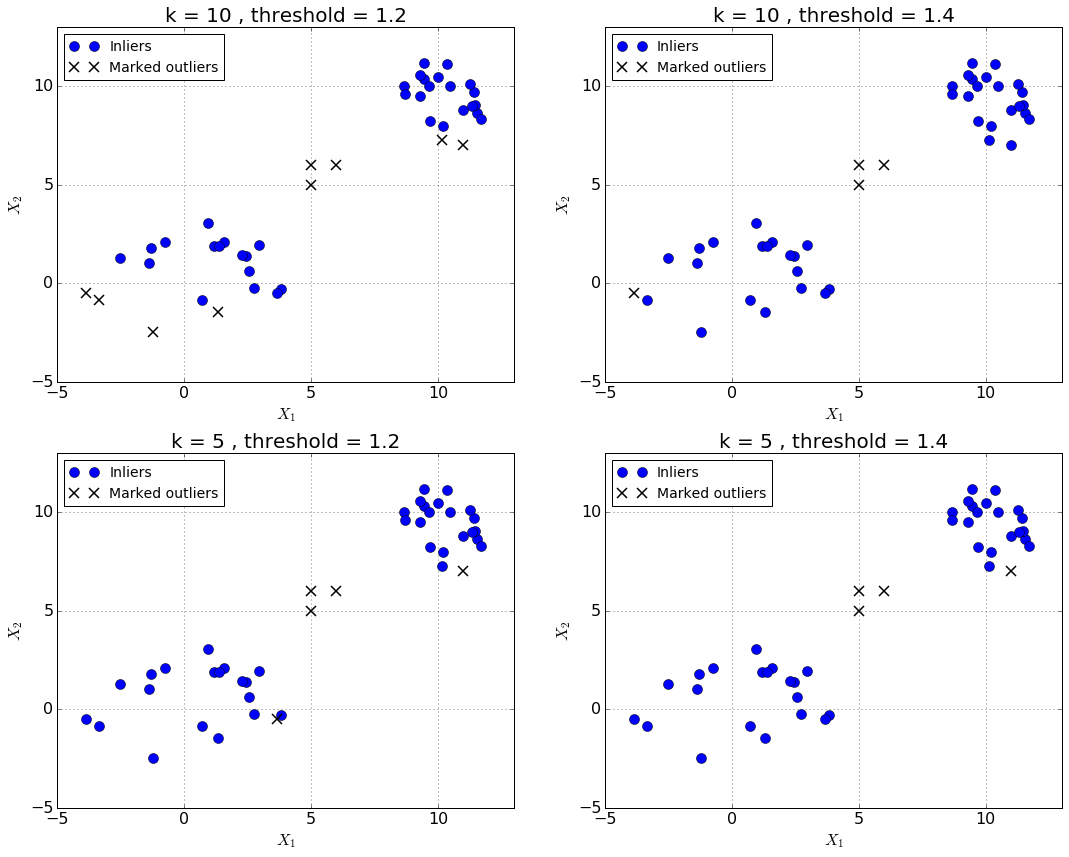

In [20]:
#Plotting properties
ms = 10 #Markersize

f2 = plt.figure(figsize=(18,14), dpi=80, facecolor='w', edgecolor='k')
"""
Three cases:
1: k=10, threshold = 1.2
2: k=10, threshold = 1.4
3: k=5, threshold = 1.2
4: k=5, threshold = 1.4
"""
n = len(X)
ks = [10.0, 10.0, 5.0, 5.0] #Neighbors to compare
ths = [1.2, 1.4, 1.2, 1.4] #Threshold limits
subplots = [221, 222, 223, 224]

for i in np.arange(4):
    threshold = ths[i]
    k = ks[i]

    knndist, knnindices = knn(X,k)
    reachdist, reachindices = reachDist(X,k,knndist)
    irdMatrix = lrd(k,reachdist)
    lofScores = np.array(lof(irdMatrix,k,reachindices))
    
    outmask = np.where(lofScores > threshold)
    inmask = np.where(lofScores <= threshold)
    inliers = [X[j] for j in inmask][0]
    outliers = [X[j] for j in outmask][0]

    ax = f2.add_subplot(2, 2, i+1)
    ax.plot(*zip(*inliers), marker='o', color='b', markersize=ms, ls='', label='Inliers')
    ax.plot(*zip(*outliers), marker='x', markeredgewidth=1.5, color='k', markersize=ms, ls='', label='Marked outliers')
    ax.set_xlabel('$X_1$', fontsize=16)
    ax.set_ylabel('$X_2$', fontsize=16)
    ax.axis([-5,13,-5,13])
    ax.set_title('k = %d , threshold = %0.1f' %(k, ths[i]), fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.legend(prop={'size':14}, markerscale=1, loc=2)
    ax.grid(True)

f3.savefig('figures/lof_example.pdf',bbox_inches='tight')

Kilde: http://shahramabyari.com/2015/12/30/my-first-attempt-with-local-outlier-factorlof-identifying-density-based-local-outliers/

Kilde: http://www.dbs.ifi.lmu.de/Publikationen/Papers/LOF.pdf